Assignment 1: Statistics

## Question : Import the necessary libraries

In [1]:
#Answer 1
#Importing key libraries of Numpy, Pandas, Plotting and statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import statsmodels.api as statm
from statsmodels.stats import weightstats as stests
from statsmodels.formula.api import ols
import csv

Additional statement to visualize inline

In [2]:
%matplotlib inline

## Question : Read the data as a data frame 

The file location is in the same directory as the notebook.

In [3]:
#Answer 2
#read statement from Pandas
insurance_df = pd.read_csv("insurance.csv")

In [4]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


From the above we can observe certain information.
1. There are large outliers in bmi, charges, number of children suggesting a right skew of the data
2. Age seems to be left skewed

## Question : Clean data, print shape, identify missing value and print data type

## print shape

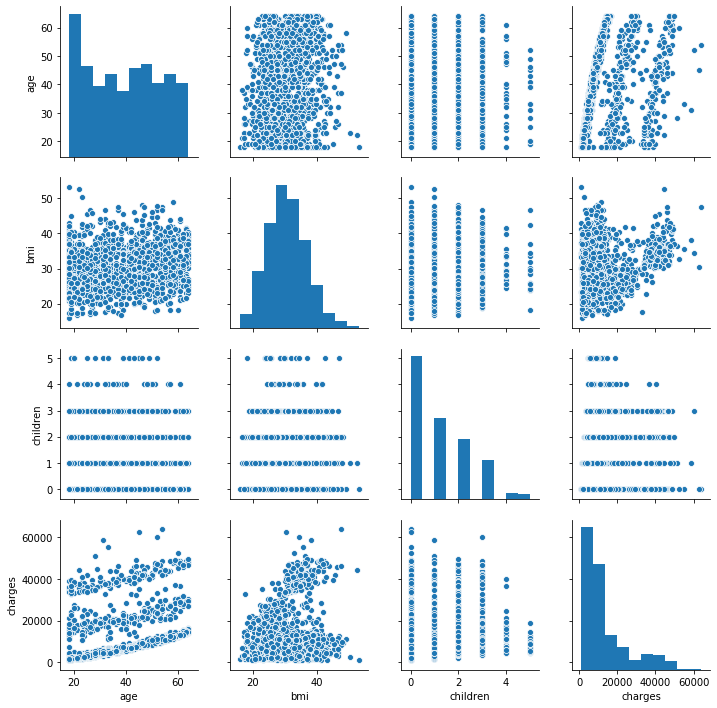

In [5]:
#determining data shapes across attributes
sns.pairplot(insurance_df)

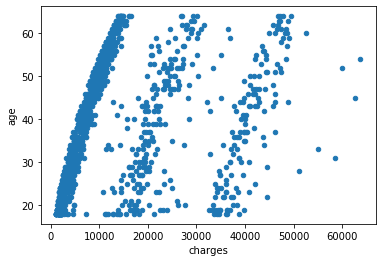

In [6]:
# plotting individual attributes in bivariate shapes
insurance_df.plot.scatter('charges','age')

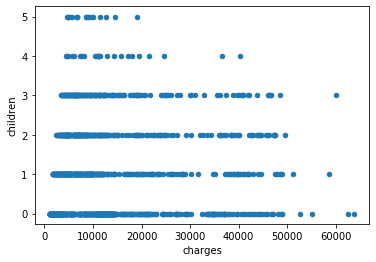

In [7]:
insurance_df.plot.scatter('charges','children')

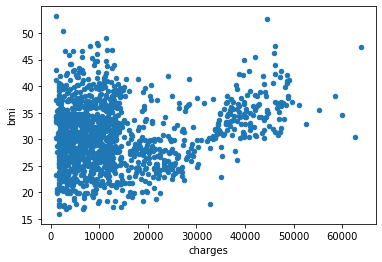

In [8]:
insurance_df.plot.scatter('charges','bmi')

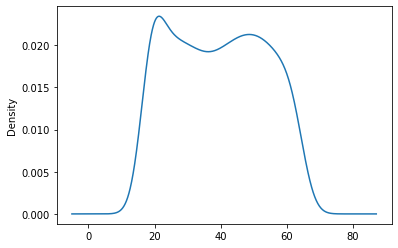

In [9]:
insurance_df["age"].plot.kde()

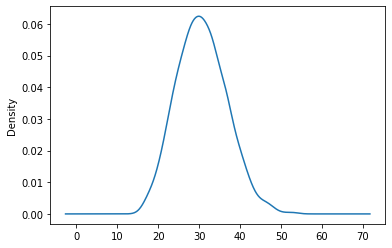

In [10]:
insurance_df["bmi"].plot.kde()

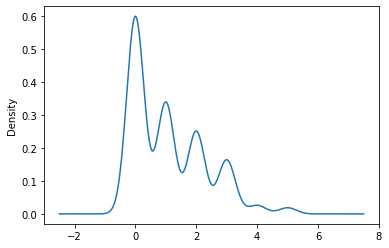

In [11]:
insurance_df["children"].plot.kde()

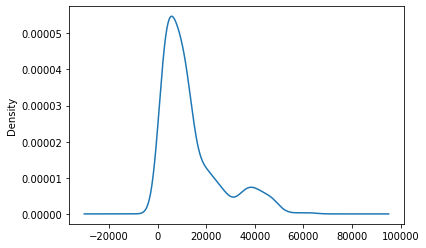

In [12]:
insurance_df["charges"].plot.kde()

Observations:
1. Strong right skew in charges 
2. slight right skew in number of children
3. Normal distributions age, bmi

## print data type

In [13]:
#The dataframe.info method provides data types of all attributes
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


from the information of the dataframe, we see there are no nulls at this time

Alternatively, we can also use df.dtypes to describe the data types

In [14]:
insurance_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## Find missing values and Clean data

In [15]:
# we compare individual values to null within the dataframe and count the trues using the isnull function
insurance_df[insurance_df.isnull()].count()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
# we try and find out if the data has any need for cleaning
print(insurance_df[(insurance_df["charges"] == np.nan) | (insurance_df["charges"] < 0)])
print(insurance_df[(insurance_df["children"] == np.nan) | (insurance_df["children"] < 0)])
print(insurance_df[(insurance_df["bmi"] == np.nan) | (insurance_df["bmi"] < 0)])
print(insurance_df[(insurance_df["age"] == np.nan) | (insurance_df["age"] < 0)])
print(insurance_df["smoker"].unique())
print(insurance_df["sex"].unique())
print(insurance_df["region"].unique())

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
['yes' 'no']
['female' 'male']
['southwest' 'southeast' 'northwest' 'northeast']


The data has no missing or nan values

In [17]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [18]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The above analysis suggests there are no missing values in the data set. And the data values appear to be correct.
Therefore there is no need to clean the data.

##  Question : Identify outlier (use boxplot), perform feature analysis and data quality check

## Outlier Identification

In [19]:
#We use the Np.percentile function to provide us the 5 point summary
charges_quartiles = np.percentile(insurance_df["charges"], [0,25,50,75,100])

In [20]:
age_quartiles = np.percentile(insurance_df["age"], [0,25,50,75,100])

In [21]:
bmi_quartiles = np.percentile(insurance_df["bmi"], [0,25,50,75,100])

In [22]:
children_quartiles = np.percentile(insurance_df["children"], [0,25,50,75,100])

In [23]:
print("\nCharges ", charges_quartiles, "\nAges ", age_quartiles, "\nBMI ", bmi_quartiles, "\nChildren ", children_quartiles)


Charges  [ 1121.8739    4740.28715   9382.033    16639.912515 63770.42801 ] 
Ages  [18. 27. 39. 51. 64.] 
BMI  [15.96    26.29625 30.4     34.69375 53.13   ] 
Children  [0. 0. 1. 2. 5.]


we can also describe the data to get a 5 point summary for all numeric attributes

In [24]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


This allows us to calculate the IQR for each of the categories

In [25]:
bmi_iqr = bmi_quartiles[3] - bmi_quartiles[1]
age_iqr = age_quartiles[3] - age_quartiles[1]
charges_iqr = charges_quartiles[3] - charges_quartiles[1]
children_iqr = children_quartiles[3] - children_quartiles[1]

using the IQR we can calculate outliers

In [26]:
insurance_df[insurance_df["bmi"] > (bmi_quartiles[3] + 1.5 * bmi_iqr)]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [27]:
insurance_df[insurance_df["bmi"] < (bmi_quartiles[1] - 1.5 * bmi_iqr)]

,age,sex,bmi,children,smoker,region,charges


In [28]:
insurance_df[insurance_df["age"] > (age_quartiles[3] + 1.5 * age_iqr)]

,age,sex,bmi,children,smoker,region,charges


In [29]:
insurance_df[insurance_df["age"] < (age_quartiles[1] - 1.5 * age_iqr)]

,age,sex,bmi,children,smoker,region,charges


In [30]:
insurance_df[insurance_df["children"] > (children_quartiles[3] + 1.5 * children_iqr)]

,age,sex,bmi,children,smoker,region,charges


In [31]:
insurance_df[insurance_df["children"] < (children_quartiles[1] - 1.5 * children_iqr)]

,age,sex,bmi,children,smoker,region,charges


In [32]:
insurance_df[insurance_df["charges"] > (charges_quartiles[3] + 1.5 * charges_iqr)]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [33]:
insurance_df[insurance_df["charges"] < (charges_quartiles[1] - 1.5 * charges_iqr)]

,age,sex,bmi,children,smoker,region,charges


We see that there are some BMI outliers (right tailed) and a lot of charges outliers (right tailed). Further ahead in this assignment we will remove some outliers based on the z-statistic. The outliers identified can now be plotted using the box plots.

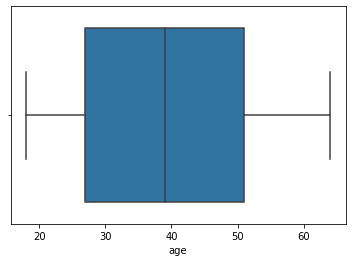

In [34]:
sns.boxplot(insurance_df["age"])

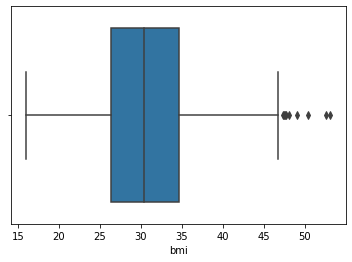

In [35]:
sns.boxplot(insurance_df["bmi"])

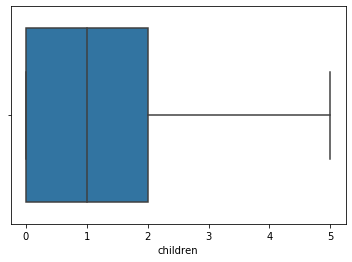

In [36]:
sns.boxplot(insurance_df["children"])

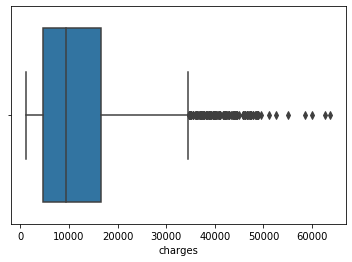

In [37]:
sns.boxplot(insurance_df["charges"])

There are multiple ways to display a 5 point summary. The easiest is to use the .describe() function. Alternatively, np.percentile is also relevant for the same purpose. This can also be visualized using the sns.boxplot function

For feature analysis we utilize the same methods as in the previous question. We print the different data descriptions and values through 1. Selection and 2. Descriptive methods. Both of which reveal that data is of good quality

## data quality check

In [38]:
print(insurance_df[(insurance_df["charges"] == np.nan) | (insurance_df["charges"] < 0)])
print(insurance_df[(insurance_df["children"] == np.nan) | (insurance_df["children"] < 0)])
print(insurance_df[(insurance_df["bmi"] == np.nan) | (insurance_df["bmi"] < 0)])
print(insurance_df[(insurance_df["age"] == np.nan) | (insurance_df["age"] < 0)])
print(insurance_df["smoker"].unique())
print(insurance_df["sex"].unique())
print(insurance_df["region"].unique())

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
['yes' 'no']
['female' 'male']
['southwest' 'southeast' 'northwest' 'northeast']


In [39]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## feature analysis

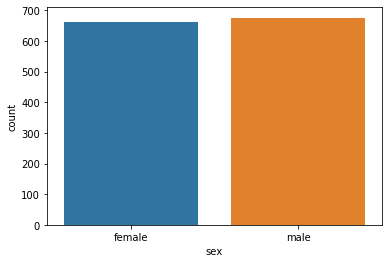

In [40]:
sns.countplot(x = "sex", data = insurance_df)

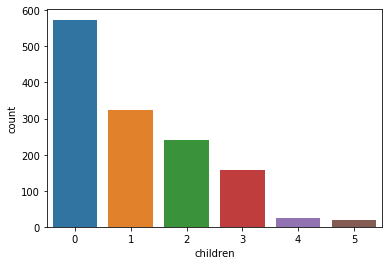

In [41]:
sns.countplot(x = "children", data = insurance_df)

It appears that a significant chunk of the population has 0 kids, and a similar proportion has 1-2 kids.

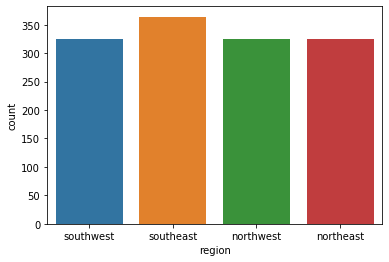

In [42]:
sns.countplot(x = "region", data = insurance_df)

the southeast region has the highest number of people in this data set

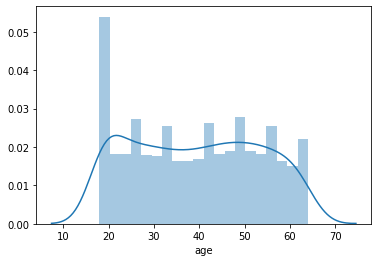

In [43]:
sns.distplot(insurance_df["age"], bins = 20)

The largest chunk of the population is around the 20 years of age. 

## Summarize data, Convert features

In [44]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [45]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Feature Conversion 
## (which is unnecessary at this stage as we do not plan on machine learning)

We could additionally refine these features manually, for example creating our own age groups

In [46]:
def updagegrp(age):
    if age < 12:
        return "kid"
    elif age < 20:
        return "teen"
    elif age < 40:
        return "adult"
    elif age < 65:
        return "middle aged"
    else:
        return "senior citizen"

insurance_df["age group"] = insurance_df["age"].apply(updagegrp)

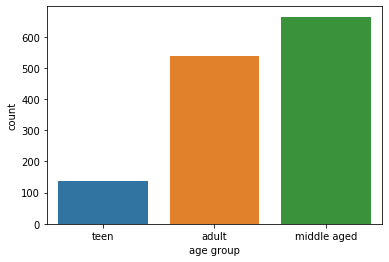

In [47]:
sns.countplot(x = "age group", data = insurance_df)

It appears that the data primarily has ages 20 - 65. teenagers are a very small subset of this group. Which makes sense considering that insurance charges is not a teen subject

Based on the above the numerical attributes and the categorical attributes look in good shape

we can also map the categorical columns to numerics for future plotting purposes

In [48]:
insurance_df["sex_"] = insurance_df["sex"].map({"male": 1, "female": 0})
insurance_df["smoke_"] = insurance_df["smoker"].map({"yes": 1, "no": 0})
insurance_df["region_"] = insurance_df["region"].map({"southwest": 1, "southeast": 2, "northwest": 3, "northeast":4})

In [49]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,age group,sex_,smoke_,region_
0,19,female,27.900,0,yes,southwest,16884.92400,teen,0,1,1
1,18,male,33.770,1,no,southeast,1725.55230,teen,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,adult,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,adult,1,0,3
4,32,male,28.880,0,no,northwest,3866.85520,adult,1,0,3


The region column would ideally be replaced by One hot encoding as below. We will not append it at this stage as it does not add value to the visualization. We are also not dropping the categorical columns as we would like to visualize them later

In [50]:
region_table = pd.get_dummies(insurance_df["region"], drop_first=True)
age_table = pd.get_dummies(insurance_df["age group"], drop_first=True)
print(region_table.head())
print(age_table.head())

#here is what we should have dropped
#insurance_df =  insurance_df.drop("region_", axis = 1) 
##insurance_df =  insurance_df.drop("region", axis = 1) 
##insurance_df =  insurance_df.drop("age group", axis = 1) 
##insurance_df =  insurance_df.drop("smoker", axis = 1) 
##insurance_df =  insurance_df.drop("sex", axis = 1) 

   northwest  southeast  southwest
0          0          0          1
1          0          1          0
2          0          1          0
3          1          0          0
4          1          0          0
   middle aged  teen
0            0     1
1            0     1
2            0     0
3            0     0
4            0     0


We can further append these tables to the dataframe for machine learning. The code is commented as it makes the visualization of pairplots difficult

In [51]:
#insurance_df = pd.concat([insurance_df,region_table], axis = 1)
#insurance_df = pd.concat([insurance_df,age_table], axis = 1)

## Question : Create data dictionary

In [52]:
insurance_dict = insurance_df.to_dict()

with open("dictstore.csv","w") as write_file:
    write_csv = csv.writer(write_file)
    for key,val in insurance_dict.items():
        write_csv.writerow([key, val])    

##  Question : Use data visualization to plot correlation matrix

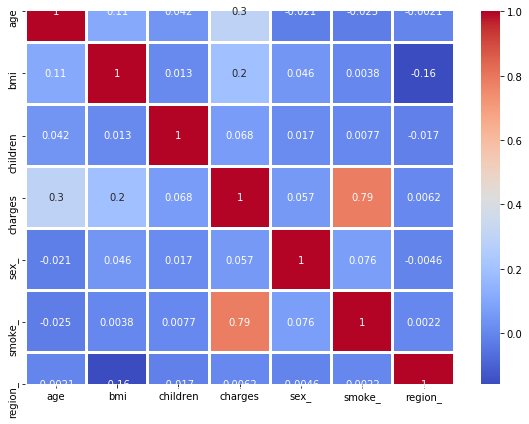

In [53]:
plt.subplots(figsize=(8,6))
sns.heatmap(insurance_df.corr(),linecolor = "white", lw = 2, annot = True, cmap = "coolwarm")
plt.tight_layout()

In [54]:
insurance_df.corr()

,age,bmi,children,charges,sex_,smoke_,region_
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.002127
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.157566
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,-0.016569
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,0.006208
sex_,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.004588
smoke_,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,0.002181
region_,-0.002127,-0.157566,-0.016569,0.006208,-0.004588,0.002181,1.000000


##  Question : Plot the distribution of 'bmi, 'age' & 'charges', measure their skewness and identify any outliers

## Distribution of BMI, AGE and CHARGES

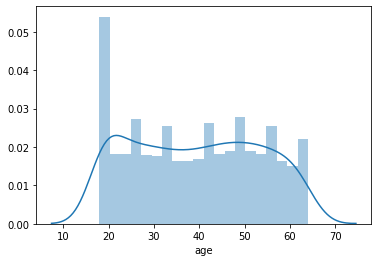

In [55]:
sns.distplot(insurance_df["age"], bins = 20)

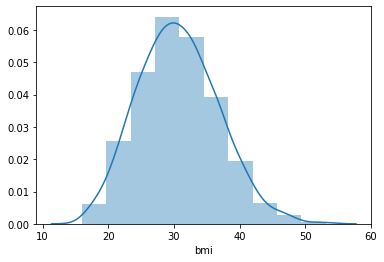

In [56]:
sns.distplot(insurance_df["bmi"], bins = 10)

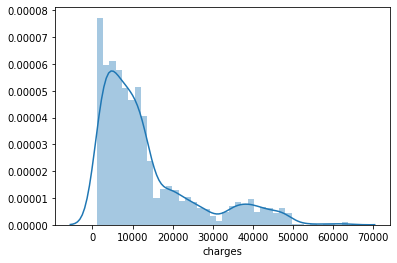

In [57]:
sns.distplot(insurance_df["charges"], bins = 40)

Most of the charges are concentrated between 0-10000.
Bmi's around 30 are very common.
The largest chunk of the population is aged around 20 

## Measuring Skew

In [58]:
#the .skew function of a data frame provides this measure
insurance_df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
sex_       -0.020951
smoke_      1.464766
region_     0.038101
dtype: float64

In [59]:
#additionally we can use the stat.skew on individual arrays
stat.skew(insurance_df["age"], axis=0, bias=True)

0.055610083072599126

In [60]:
stat.skew(insurance_df["bmi"], axis=0, bias=True)

0.28372857291709386

In [61]:
stat.skew(insurance_df["children"], axis=0, bias=True)

0.9373281163874423

In [62]:
stat.skew(insurance_df["charges"], axis=0, bias=True)

1.5141797118745743

There are two ways to obtain the skew. The scipy.stats methods for individual arrays, and the dataframe.skew. The skew numbers suggest a right tail in all of the distributions. The charges and children show a much stronger skew than the age/bmi groups

## Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

Outliers can be detected by using a box plot for visualization and by using Z Scores to extract them directly. In the below solution we are using Z scores. Any value outside the z score of 3(more than 3 standard deviations) is tagged as an outlier. By change the value z_critical we can change the threshold for the outliers

In [63]:
z_critical = 3
z = np.abs(stat.zscore(insurance_df[["bmi"]]))
bmi_outliers = insurance_df[["bmi"]] [z>z_critical]
z = np.abs(stat.zscore(insurance_df[["age"]]))
age_outliers = insurance_df[["age"]] [z>z_critical]
z = np.abs(stat.zscore(insurance_df[["charges"]]))
charges_outliers = insurance_df[["charges"]] [z>z_critical]

In [64]:
bmi_outliers 

,bmi
116,49.06
847,50.38
1047,52.58
1317,53.13


In [65]:
age_outliers #indicates no outliers for ages against the threshold of z_critical = 3

,age


In [66]:
charges_outliers

,charges
34,51194.55914
543,63770.42801
577,58571.07448
819,55135.40209
1146,52590.82939
1230,60021.39897
1300,62592.87309


## Question : Explain about missing value treatment & outliers, identify them and treat them appropriately

Missing values can be treated in multiple ways
1. We use imputation to fill them
2. We use mean/median based on the specific category they belong to
3. If they are very few in number, we drop them

As for outliers, we generally drop them, unless we have heteroscedasticity in the distribution. In which case we can use natural logs to scale them down. Another potential option is to merge them with a related column

In [67]:
insurance_df["age"].count()

1338

In this case, we will drop the rows with the outlier values

In [68]:
insurance_df = insurance_df[insurance_df ["bmi"] < min(bmi_outliers["bmi"])]
insurance_df = insurance_df[insurance_df ["charges"] < min(charges_outliers["charges"])]

In [69]:
insurance_df["age"].count()

1327

## Question : Analyse categorical columns using box plot, Scatter plot & Bar plots

## bar plots

In [70]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,age group,sex_,smoke_,region_
0,19,female,27.900,0,yes,southwest,16884.92400,teen,0,1,1
1,18,male,33.770,1,no,southeast,1725.55230,teen,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,adult,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,adult,1,0,3
4,32,male,28.880,0,no,northwest,3866.85520,adult,1,0,3


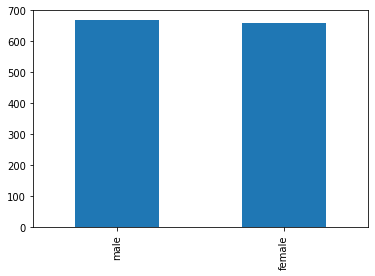

In [71]:
insurance_df["sex"].value_counts().plot.bar()

The men and women are almost equally distributed

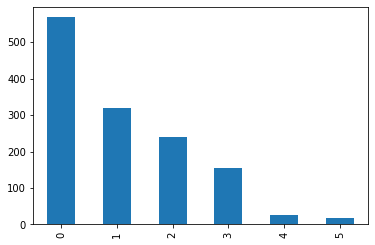

In [72]:
insurance_df["children"].value_counts().plot.bar()

People with 0 children are the most common, and people with one or two children constitute an almost equal amount of the population

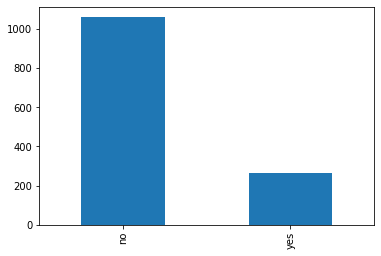

In [73]:
insurance_df["smoker"].value_counts().plot.bar()

Majority of the population are non smokers. Thus this sample may be biased towards them

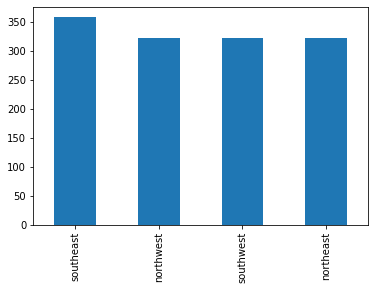

In [74]:
insurance_df["region"].value_counts().plot.bar()

there is congruence across the number of people in the different regions

## box plots

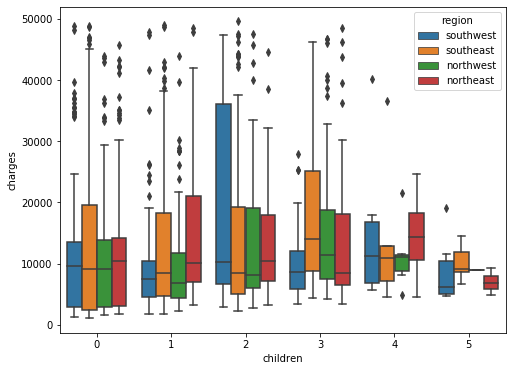

In [75]:
plt.subplots(figsize=(8,6))
sns.boxplot(x = "children", y = "charges", hue = "region", data = insurance_df)

Despite a slightly cluttered graph, we can see that the median individual for souteast with 3 kids pays more than his peers. A Similar situation exists for the median payer in northeast with 4 kids. People with 5 kids seem to be paying the lowest charges

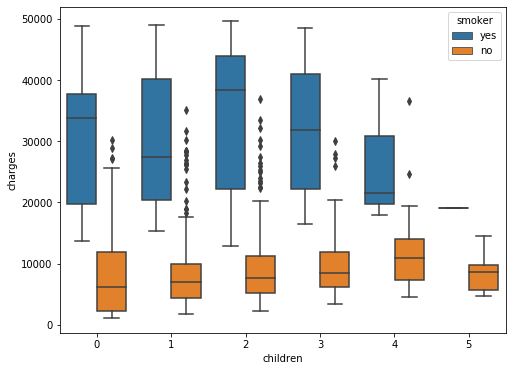

In [76]:
plt.subplots(figsize=(8,6))
sns.boxplot(x = "children", y = "charges", hue = "smoker", data = insurance_df)

The median smoker charges are the highest for the group with 2 kids and the lowest for 4 kids (with 5 kids the data does not seem to have enough data points). It is also interesting to note that there are far more outliers in non smokers with 1 and 2 kids

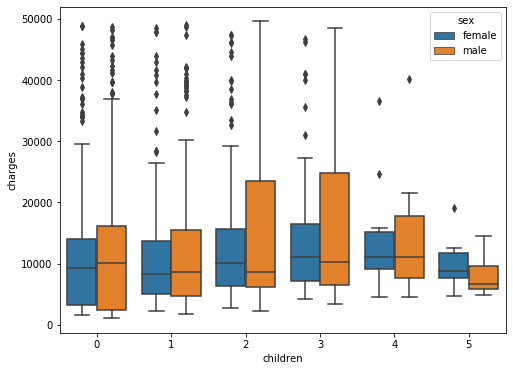

In [77]:
plt.subplots(figsize=(8,6))
sns.boxplot(x = "children", y = "charges", hue = "sex", data = insurance_df)

charges for the median payer rise with the number of kids (from 1 till 4). Charges for the median 5 kid individual are much lower than the peer group.

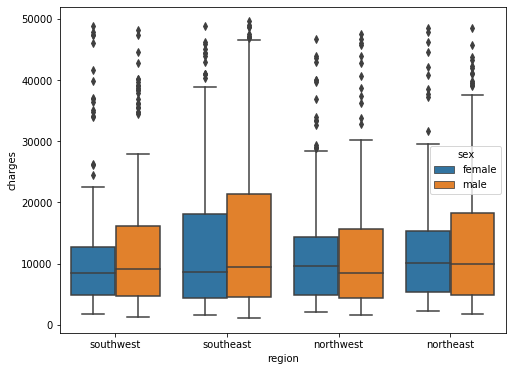

In [78]:
plt.subplots(figsize=(8,6))
sns.boxplot(x = "region", y = "charges", hue = "sex", data = insurance_df)

Gender charges across regions are more or less similar

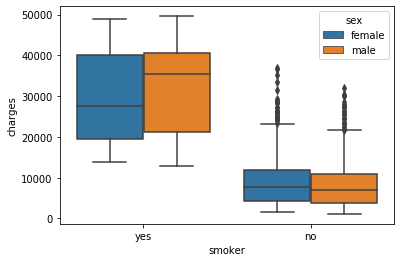

In [79]:
sns.boxplot(x = "smoker", y = "charges", hue = "sex", data = insurance_df)

The median Female smokers pay less than median male smokers 

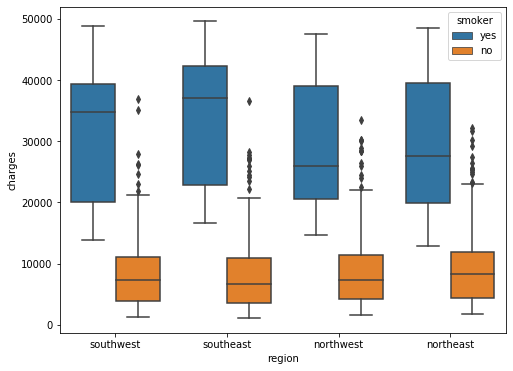

In [80]:
plt.subplots(figsize=(8,6))
sns.boxplot(x = "region", y = "charges", hue = "smoker", data = insurance_df)

The median smoker in the south pays much more than the median smoker in the north.

## scatter plots
we will use the categorical scatter plots (strip plots to take a look at the categorical data)

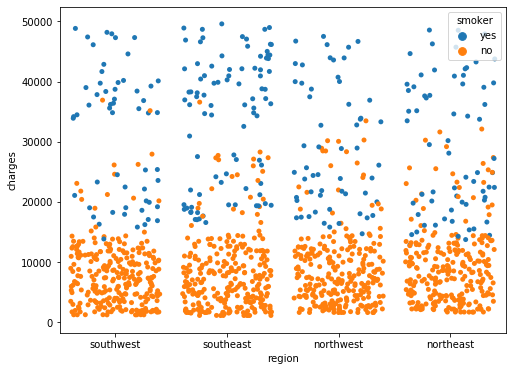

In [81]:
plt.subplots(figsize=(8,6))
sns.stripplot(x = "region", y = "charges", hue= "smoker", jitter = 0.4, data = insurance_df)

High charges are more common in the south than in the north. This seems correlated to higher smoking in the south.

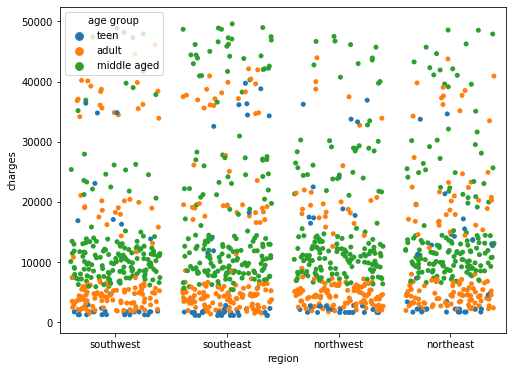

In [82]:
plt.subplots(figsize=(8,6))
sns.stripplot(x = "region", y = "charges", hue= "age group", jitter = 0.4, data = insurance_df)

Based on this graph, it is clear that the charges increase depending on the age group

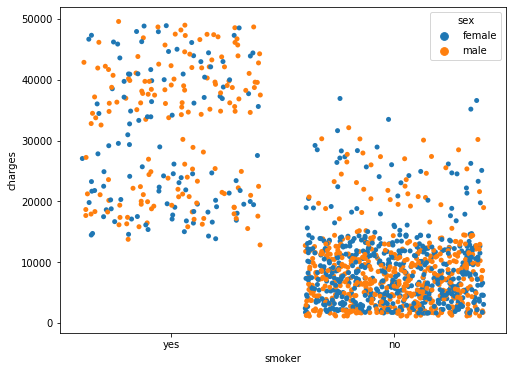

In [83]:
plt.subplots(figsize=(8,6))
sns.stripplot(x = "smoker", y = "charges", hue = "sex", jitter = 0.4,data = insurance_df)

Smokers face heavier charges than non smokers/female smokers. Non smokers are the most common group in this set.

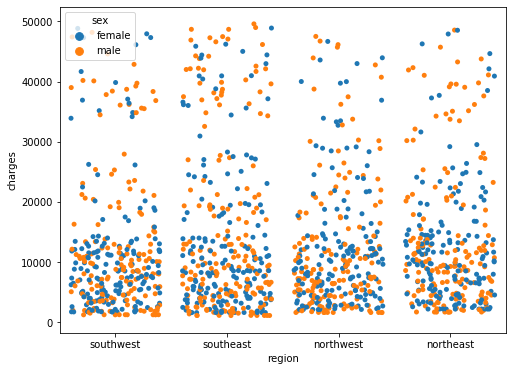

In [84]:
plt.subplots(figsize=(8,6))
sns.stripplot(x = "region", y = "charges", hue = "sex", jitter = 0.4,data = insurance_df)

Charges across genders are similar. Southwest seems to have more females than the other groups

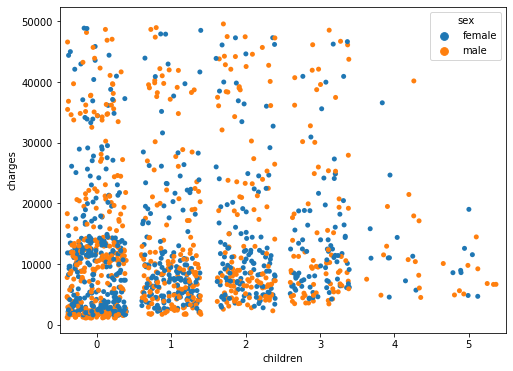

In [85]:
plt.subplots(figsize=(8,6))
sns.stripplot(x = "children", y = "charges", hue = "sex", jitter = 0.4, data = insurance_df)

Cases with no children are most common. 4 and 5 kids are quite uncommon and mostly have low charges. For 2 children there are a lot of cases that have high charges.

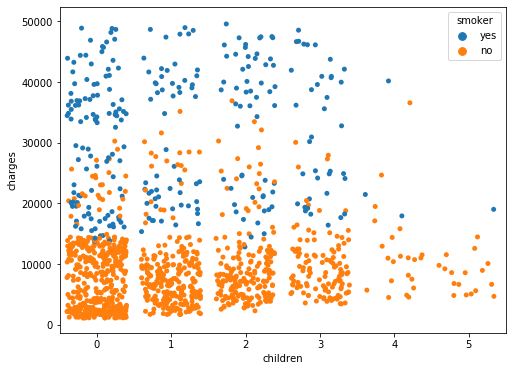

In [86]:
plt.subplots(figsize=(8,6))
sns.stripplot(x = "children", y = "charges", hue = "smoker", jitter = 0.4, data = insurance_df)

For 2 children we see a lot of people who are smokers, this is the reason for the high charges in the previous chart

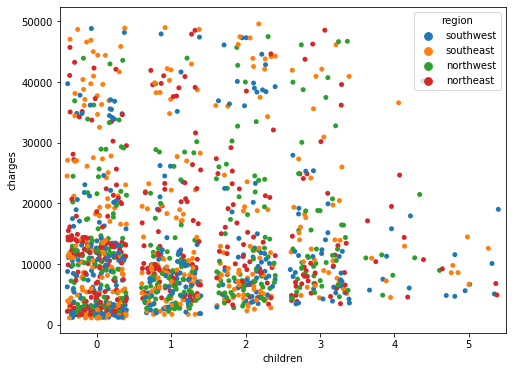

In [87]:
plt.subplots(figsize=(8,6))
sns.stripplot(x = "children", y = "charges", hue = "region",jitter = 0.4, data = insurance_df)

This categorical scatterplot is almost useless. No insight available from it.

## Question : Use pair-plot to identify strong correlation among variables

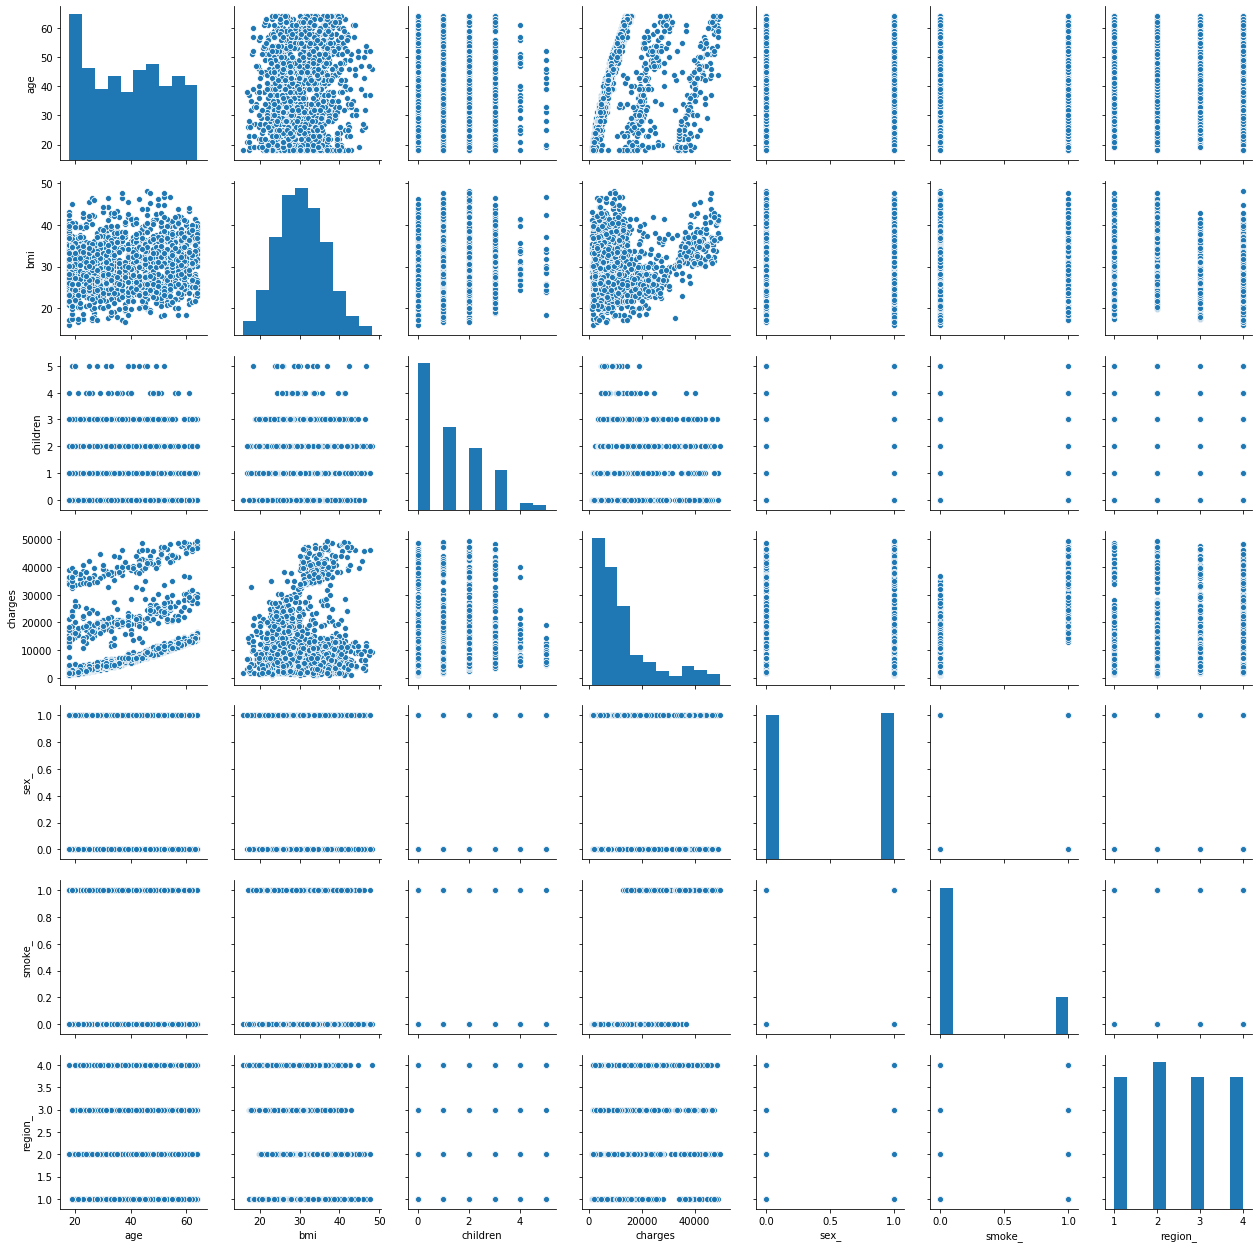

In [88]:
# just the pairplot command to plot the numerical attributes against one another
sns.pairplot(insurance_df)

Based on the above pair plot. Apart from increased charges for smokers, there are no strong relationships apparent. However, It seems that charges rise with increase of age, bmi and reduce with increase in children 

Trivia: People in southeast seem to be heavier on average.

## Question 4. Answer the following questions with statistical evidence (28 marks)

## Question 4a. Do charges of people who smoke differ significantly from the people who don't? (7 marks)

In [89]:
# creating two data frames for smokers and non smokers
smoker = insurance_df[insurance_df["smoker"] == "yes"]
non_smoker = insurance_df[insurance_df["smoker"] == "no"]

In [90]:
#putting together the non smoker and smoker 5 point summaries to see them better
pd.DataFrame([non_smoker["charges"].describe(), smoker["charges"].describe()], index = ["non smoker", "smoker"])

,count,mean,std,min,25%,50%,75%,max
non smoker,1061.0,8443.994935,5994.582246,1121.8739,3989.841000,7345.7266,11362.7550,36910.60803
smoker,266.0,31328.517137,10872.485763,12829.4551,20409.144862,34036.9105,40382.6757,49577.66240


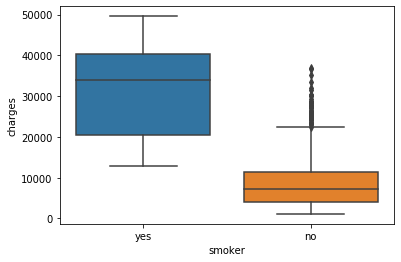

In [91]:
sns.boxplot(x = "smoker", y = "charges", data = insurance_df)

Let us also look at the difference from a Z-statistic basis

In [92]:
mean_smoker = np.mean(smoker["charges"])
std_smoker = np.std(smoker["charges"])
n_smoker = smoker["charges"].count()
print("Smoker:\n", "mean", mean_smoker, "\nstd", std_smoker, "\ncount", n_smoker)

Smoker:
 mean 31328.517137105253 
std 10852.029516057819 
count 266


In [93]:
mean_non_smoker = np.mean(non_smoker["charges"])
std_non_smoker = np.std(non_smoker["charges"])
n_non_smoker = non_smoker["charges"].count()

print("Non Smoker:\n", "mean", mean_non_smoker, "\nstd", std_non_smoker, "\ncount", n_non_smoker)

Non Smoker:
 mean 8443.994934607914 
std 5991.756611617691 
count 1061


Since the number of samples are greater than 30, this is a case for the Z-statistic. Also, to be significantly different, let us assume that alpha (α) is 0.01. This implies that the two cut off values are 0.005 and 0.995

In [94]:
z_left = stat.norm.ppf(0.005)
z_right = stat.norm.ppf(0.995)
print(z_left,z_right)

-2.575829303548901 2.5758293035489004


Therefore, The cutoff z-values for 99% confidence level are + or - 2.58. We will now calculate the z difference amongst these distributions

In [95]:
z = ((mean_non_smoker - mean_smoker)/(
    ((std_non_smoker**2)/n_non_smoker)+
  ((std_smoker**2)/n_smoker))** 0.5)
z

-33.149669503389504

The above graph and statistics demonstrate clearly that the charges for smokers vs non smokers differ greatly

## Question 4b. Does bmi of males differ significantly from that of females? (7 marks)

In [96]:
# lets separate out the male and females in data frames
male = insurance_df[insurance_df["sex"] == "male"]
female = insurance_df[insurance_df["sex"] == "female"]

In [97]:
# the below represents a concatenated data frame of the 5 point summary of the two data groups
pd.DataFrame([male["bmi"].describe(), female["bmi"].describe()], index = ["male", "female"])

,count,mean,std,min,25%,50%,75%,max
male,668.0,30.805928,5.964126,15.960,26.4075,30.59,34.81625,47.74
female,659.0,30.332375,6.012259,16.815,26.0775,30.02,34.20500,48.07


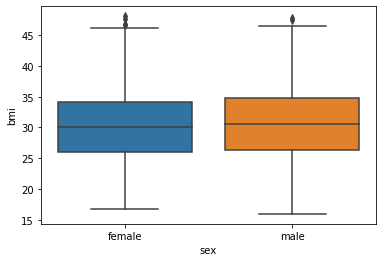

In [98]:
sns.boxplot(x = "sex", y = "bmi", data = insurance_df)

From the box plots. It looks like both distributions are very similar. Let us analyze it further using a z-test of variation

In [99]:
mean_male = np.mean(male["bmi"])
std_male = np.std(male["bmi"])
n_male = male["bmi"].count()
print("BMI Male:\n", "mean", mean_male, "\nstd", std_male, "\ncount", n_male)

BMI Male:
 mean 30.805928143712542 
std 5.9596602345773935 
count 668


In [100]:
mean_female = np.mean(female["bmi"])
std_female = np.std(female["bmi"])
n_female = female["bmi"].count()
print("BMI Female:\n", "mean", mean_female, "\nstd", std_female, "\ncount", n_female)

BMI Female:
 mean 30.332374810318687 
std 6.007696026381904 
count 659


Since the number of samples are greater than 30, this is a case for the Z-statistic. Also, to be significantly different, let us assume that alpha (α) is 0.10. This implies that the two cut off values are 0.05 and 0.95

In [101]:
# calculate the interval
z_left = stat.norm.ppf(0.05)
z_right = stat.norm.ppf(0.95)
print(z_left,z_right)

-1.6448536269514729 1.6448536269514722


In [102]:
#calculating the z score 
z = (mean_male - mean_female)/((
    ((std_male**2)/n_male)+
  ((std_female**2)/n_female))**0.5)
z

1.441387760684053

The z statistic is under 1.64 at alpha of 0.1 

Consequently, we can say at a confidence level of 90% that the distributions are not significantly different.

## Question 4c. Is the proportion of smokers significantly different in different genders? (7 marks)

In [103]:
# lets create separate data frames for male and female smokers and calculate their proportion
smoker_proportion = (insurance_df[insurance_df["smoker"] == "yes"]["smoker"].count())/(insurance_df["smoker"].count())
male_smoker = insurance_df[(insurance_df["smoker"] == "yes") & (insurance_df["sex"] == "male")]
male_smoker_proportion = male_smoker["smoker"].count()/insurance_df[insurance_df["sex"] == "male"]["smoker"].count()
female_smoker = insurance_df[(insurance_df["smoker"] == "yes") & (insurance_df["sex"] == "female")]
female_smoker_proportion = female_smoker["smoker"].count()/insurance_df[insurance_df["sex"] == "female"]["smoker"].count()

n_male_smokers = male_smoker["smoker"].count()
n_female_smokers = female_smoker["smoker"].count()
n_male = insurance_df[insurance_df["sex"] == "male"]["smoker"].count()
n_female = insurance_df[insurance_df["sex"] == "female"]["smoker"].count()
n_male_non_smokers = n_male - n_male_smokers
n_female_non_smokers = n_female - n_female_smokers
print("Total Smokers: ", smoker_proportion, "\nMale Smokers: ", male_smoker_proportion, "\nFemale Smokers: ", female_smoker_proportion)
print (n_male_smokers, n_female_smokers, n_male, n_female, n_male_non_smokers, n_female_non_smokers)

Total Smokers:  0.2004521477015825 
Male Smokers:  0.23053892215568864 
Female Smokers:  0.16995447647951442
154 112 668 659 514 547


The Z-test for two proportions is given as 
## ((p1 - p2) - delta)
## -------------------------------------
## ((p(1-p)) ((1/n1) + (1/n2))) ** 0.5
since we assume no difference in proportions, delta is 0

standard error computation

In [104]:
standard_err = (
    ((male_smoker_proportion * (1 - male_smoker_proportion))/n_male) +
    ((female_smoker_proportion * (1 - female_smoker_proportion))/n_female)
) ** 0.5
standard_err

0.021900266595030634

In [105]:
p = smoker_proportion
n1 = n_male
n2 = n_female
p1 = male_smoker_proportion
p2 = female_smoker_proportion
z = (p1-p2)/(((p*(1-p))*((1/n1) + (1/n2)))**0.5)
z

2.756316140903392

Z - value for 95% confidence

In [106]:
# calculate the interval z scores for alpha = 0.05
z_left = stat.norm.ppf(0.025)
z_right = stat.norm.ppf(0.975)
print(z_left,z_right)

-1.9599639845400545 1.959963984540054


Z - value for 99% confidence

In [107]:
z_left = stat.norm.ppf(0.005)
z_right = stat.norm.ppf(0.995)
print(z_left,z_right)

-2.575829303548901 2.5758293035489004


At both 99% and 95% confidence levels, The calculated Z value exceeds the critical Z. Thus, this is indicative that the difference is significant

In [108]:
n_expected_male_smokers = n_male * smoker_proportion
n_expected_female_smokers = n_female * smoker_proportion
n_expected_male_non_smokers = n_male * (1 - smoker_proportion)
n_expected_female_non_smokers = n_female * (1 - smoker_proportion)
print (n_expected_male_smokers,n_expected_female_smokers, n_expected_male_non_smokers, n_expected_female_non_smokers)

133.90203466465712 132.09796533534288 534.0979653353429 526.9020346646571


In [109]:
chi_2_calculated = (((n_male_smokers - n_expected_male_smokers) ** 2)/n_expected_male_smokers) + (
    ((n_female_smokers - n_expected_female_smokers) ** 2)/n_expected_female_smokers)  + (
    ((n_male_non_smokers - n_expected_male_non_smokers) ** 2)/n_expected_male_non_smokers) + (
    ((n_female_non_smokers - n_expected_female_non_smokers) ** 2)/n_expected_female_non_smokers)
print(chi_2_calculated)
stat.chisquare([154, 514, 112, 547], f_exp=[134, 534, 132, 527])

7.597278668604568


Power_divergenceResult(statistic=7.523454610313135, pvalue=0.05695885543381293)

assuming confidence level of 99%, we can calculate chi2 critical value. In this case, there are only 2 categories (male/female) and therefore degrees of freedom is 1 (n-1)

In [110]:
# calculating chi2 critical values for 99% and 95%
print ("99%", stat.chi2.ppf(0.99, 1))
print ("\n95%", stat.chi2.ppf(0.95, 1))

99% 6.6348966010212145

95% 3.841458820694124


In conclusion, if we compare the chi2 calculated aginst the critical values, the difference is significant at 95% confidence and 99% confidence levels

TRIVIA: If we square the Z value in step 104 (2.756316140903392), we arrive at the Chi squared value in cell 108. Confirming the analysis.

## Question 4d. Is the distribution of bmi across women with no children, one child and two children, the same? (7 marks)

We will try to evaluate this in a few ways. Firstly, lets take a look at the data

In [111]:
# selecting women with 0 -2 children and their BMI
children1_2_3 = insurance_df[(insurance_df["children"]<3) & (insurance_df["sex"] == "female")][["children","bmi"]]

In [112]:
print(children1_2_3["children"].unique())
print(children1_2_3["children"].count())

[0 1 2]
563


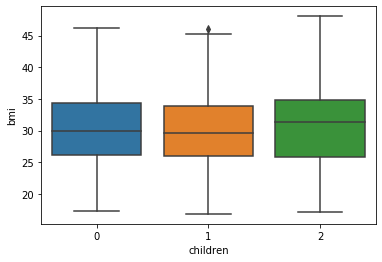

In [113]:
sns.boxplot(x = "children", y = "bmi", data = children1_2_3)

from the graph, the data appears to be similar

In [114]:
#calculate metrics on data
child0_mean = np.mean(children1_2_3[(children1_2_3["children"] == 0) ]["bmi"])
child1_mean = np.mean(children1_2_3[(children1_2_3["children"] == 1) ]["bmi"])
child2_mean = np.mean(children1_2_3[(children1_2_3["children"] == 2) ]["bmi"])
print (child0_mean, " ", child1_mean, " ", child2_mean)

30.28411149825785   30.00143312101911   30.64978991596637


In [115]:
child0_std = np.std(children1_2_3[(children1_2_3["children"] == 0) ]["bmi"])
child1_std = np.std(children1_2_3[(children1_2_3["children"] == 1) ]["bmi"])
child2_std = np.std(children1_2_3[(children1_2_3["children"] == 2) ]["bmi"])
print (child0_std, " ", child1_std, " ", child2_std)

5.883584912543391   5.750897300548044   6.600291609134599


In [116]:
child0_var = np.var(children1_2_3[(children1_2_3["children"] == 0) ]["bmi"])
child1_var = np.var(children1_2_3[(children1_2_3["children"] == 1) ]["bmi"])
child2_var = np.var(children1_2_3[(children1_2_3["children"] == 2) ]["bmi"])
print (child0_var, " ", child1_var, " ", child2_var)

34.616571423108226   33.07281976145078   43.5638493256126


In [117]:
child0_n = children1_2_3[(children1_2_3["children"] == 0) ]["bmi"].count()
child1_n = children1_2_3[(children1_2_3["children"] == 1) ]["bmi"].count()
child2_n = children1_2_3[(children1_2_3["children"] == 2) ]["bmi"].count()
print (child0_n, " ", child1_n, " ", child2_n)

287   157   119


In [118]:
#putting the data frames together
children_bmi = children1_2_3[children1_2_3["children"] == 0][["children", "bmi"]]
children_bmi = pd.concat([children_bmi, children1_2_3[children1_2_3["children"] == 1][["children", "bmi"]]], axis = 0)
children_bmi = pd.concat([children_bmi, children1_2_3[children1_2_3["children"] == 2][["children", "bmi"]]], axis = 0)
children_bmi.count()

children    563
bmi         563
dtype: int64

In [119]:
children_bmi.head()

,children,bmi
0,0,27.90
5,0,25.74
9,0,25.84
11,0,26.29
13,0,39.82


In [120]:
result = ols ("bmi ~ children", data = children_bmi).fit()

In [121]:
aov_tab = statm.stats.anova_lm(result, typ = 2)

In [122]:
aov_tab

,sum_sq,df,F,PR(>F)
children,5.258197,1.0,0.145065,0.703441
Residual,20334.685418,561.0,NaN,NaN


In [123]:
#calculating F critical for 3 groups and 563 observations. 
#Degrees of freedom #1 = 3 - 1  = 2 and degrees of freedom #2 = 563 - 3 = 560
stat.f.ppf(1 - 0.05, 2, 560)

3.0118153155570746

The F critical is far larger than the F suggested by the Anova. Consequently, we fail to reject the current hypothesis H0. The datagroups are similar